82.39845261121857 85.54913294797687
0.772058011353 0.767535432634
82.39845261121857 85.54913294797687
0.74412157317 0.735082351538
82.39845261121857 85.54913294797687
0.716190684339 0.702640753905
82.39845261121857 85.54913294797687
0.688265343751 0.670210636928
82.39845261121857 85.54913294797687
0.660345550297 0.637791997802
82.39845261121857 85.54913294797687
0.632431302867 0.605384833721
82.39845261121857 85.54913294797687
0.604522600352 0.572989141881
82.39845261121857 85.54913294797687
0.576619441643 0.540604919477
82.39845261121857 85.54913294797687
0.548721825631 0.508232163705
82.39845261121857 85.54913294797687
0.520829751208 0.475870871763
82.39845261121857 85.54913294797687
0.493115282161 0.4436312077
82.39845261121857 85.54913294797687
0.46815144789 0.41491010784
82.39845261121857 85.54913294797687
0.448521184931 0.394044141287
82.59187620889749 86.70520231213872
0.43387408347 0.379920678849
83.17214700193423 87.28323699421965
0.420717057443 0.3689356466
84.91295938104449 

85.49323017408123 85.54913294797687
0.23778042347 0.238146325223
85.49323017408123 85.54913294797687
0.237730741662 0.238112115981
85.49323017408123 85.54913294797687
0.237681933898 0.238082805049
85.49323017408123 85.54913294797687
0.23763661891 0.23808272029
85.49323017408123 85.54913294797687
0.237591312959 0.238082649301
85.49323017408123 85.54913294797687
0.237546526306 0.23808259208
85.49323017408123 85.54913294797687
0.237502655558 0.238084359837
85.49323017408123 85.54913294797687
0.237458793584 0.238086140525
85.49323017408123 85.54913294797687
0.237415013694 0.238087934143
85.49323017408123 85.54913294797687
0.237372989961 0.238094966024
85.49323017408123 85.54913294797687
0.237331927475 0.238081919516
85.49323017408123 85.54913294797687
0.237291270233 0.238075840532
85.49323017408123 85.54913294797687
0.237250712348 0.238071585974
85.49323017408123 85.54913294797687
0.237211790094 0.238044339167
85.49323017408123 85.54913294797687
0.237172986938 0.23801710642
85.493230174081

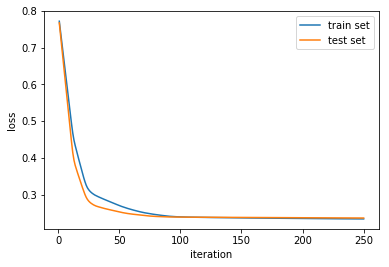

In [1]:


import numpy as np
import sklearn.datasets as ds
import sklearn.model_selection as ms
import matplotlib.pyplot as plt

path = 'E:\\australian_scale.txt'

X,y = ds.load_svmlight_file(path)
X_train, X_test, y_train, y_test = ms.train_test_split(X,y)

X_train = X_train.toarray()
X_test = X_test.toarray()

tmp = np.ones((X_train.shape[0],0))
y_train = np.insert(tmp, 0, values=y_train, axis=1)

tmp = np.ones((X_test.shape[0],0))
y_test = np.insert(tmp, 0, values=y_test, axis=1)

#y_train = y_train.toarray()
#y_test = y_test.toarray()

def max(a, b):
	if a>b :
		return a
	else :
		return b

def loss(W, b, X, y, C):
	ans = 0
	m = X.shape[0]
	for i in range(0, m):
		ans += max(0, 1-y[i]*(X[i].dot(W)+b))

	return ans*C + np.sum(W*W)/2

def Gwb(x, y, W, b):
	if 1-y*(x.dot(W)+b) >= 0:
		return -y*x, -y
	else:
		return np.zeros(len(x)), 0

def fuck(x):
	return np.insert(np.ones((len(x),0)), 0, values = x, axis=1)

def update(W, b, X, y, C):
	retw = np.zeros((X.shape[1],1))
	retb = 0
	for i in range(0, X.shape[0]):
		tmp = Gwb(X[i], y[i], W, b)
		retw += fuck(tmp[0])
		retb += tmp[1]

	retw = retw*C + W
	return retw, retb*C


import random
def train(X, y, X_test, y_test):

	alpha = 0.0001
	W = np.zeros((X.shape[1],1))
	b = 0
	C = 0.8
	
	"""
	for i in range(0, W.shape[0]):
		W[i][0] = random.uniform(-1,1);
	"""

	px = []
	l_train = []
	l_test = []
	c_train = []
	c_test = []
	for i in range(1, 251):
		tmp = update(W, b, X, y, C)
		W -= alpha * tmp[0]
		b -= alpha * tmp[1]

		cnt1 = 0
		cnt2 = 0
		for j in range(0, X.shape[0]):
			if y[j]*(X[j].dot(W)+b) >= 0:
				cnt1+=1
		for j in range(0, X_test.shape[0]):
			if y_test[j]*(X_test[j].dot(W)+b) >= 0:
				cnt2+=1

		print(cnt1*100/X.shape[0], cnt2*100/X_test.shape[0])
		c_train.append(cnt1*100/X.shape[0])
		c_test.append(cnt2*100/X_test.shape[0])
	
		px.append(i)
		loss1 = loss(W, b, X, y, C)/X.shape[0]
		loss2 = loss(W, b, X_test, y_test, C)/X_test.shape[0]
		print(loss1[0], loss2[0])
		l_train.append(loss1)
		l_test.append(loss2)

	plt.plot(px, l_train, label='train set')
	plt.plot(px, l_test, label='test set')
	plt.xlabel('iteration')
	plt.ylabel('loss')
	plt.legend(loc = 'upper right')
	plt.show()



train(X_train, y_train, X_test, y_test)

